# `Eda international results 1874-2024`

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [45]:
df_goals = pd.read_csv("./data/goalscorers.csv")
df_results = pd.read_csv("./data/results.csv")
df_shootouts= pd.read_csv("./data/shootouts.csv")

In [46]:
df_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [47]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47912,2024-11-19,Oman,Iraq,0,1,FIFA World Cup qualification,Muscat,Oman,False
47913,2024-11-19,Kuwait,Jordan,1,1,FIFA World Cup qualification,Kuwait City,Kuwait,False
47914,2024-11-19,Bahrain,Australia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47915,2024-11-19,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [48]:
df_shootouts# borarre la columna de first shooter porque tine demasiados nulos y no sirve

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
640,2024-07-05,Venezuela,Canada,Canada,Venezuela
641,2024-07-06,England,Switzerland,England,England
642,2024-07-06,Uruguay,Brazil,Uruguay,Uruguay
643,2024-07-13,Canada,Uruguay,Uruguay,Canada


### limpieza de datos

In [49]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [50]:
df_goals.isna().sum() 

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [51]:
df_shootouts.columns


Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')

In [52]:
df_shootouts = df_shootouts.drop(columns="first_shooter")

In [53]:
df_shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [54]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       645 non-null    object
 1   home_team  645 non-null    object
 2   away_team  645 non-null    object
 3   winner     645 non-null    object
dtypes: object(4)
memory usage: 20.3+ KB


In [55]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [56]:
df_goals.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [57]:
df_goals.loc[df_goals["minute"].isna()]
# para ver las filas con nulos

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
3347,1960-10-16,Taiwan,Vietnam Republic,Taiwan,Yiu Cheuk Yin,NaN,False,False
4059,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4060,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4063,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
4064,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
...,...,...,...,...,...,...,...,...
16812,1997-03-27,Saudi Arabia,Bangladesh,Saudi Arabia,Abdullah Al-Dosari,NaN,False,False
16838,1997-03-29,Taiwan,Bangladesh,Taiwan,Hsu Te Ming,NaN,False,False
16839,1997-03-29,Taiwan,Bangladesh,Bangladesh,Alfaz Ahmed,NaN,False,False
16840,1997-03-29,Taiwan,Bangladesh,Bangladesh,Imtiaz Ahmed Nakib,NaN,False,False


In [58]:
df_goals["scorer"].fillna(0,inplace= True) # limpiamos la columna de scorer y le ponemos a los valores NaN 0 porque No habia goles en esos partidos

C:\Users\marco\AppData\Local\Temp\ipykernel_4916\1422036386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goals["scorer"].fillna(0,inplace= True) # limpiamos la columna de scorer y le ponemos a los valores NaN 0 porque No habia goles en esos partidos


In [59]:
df_goals["minute"].fillna('mean',inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_4916\4103642363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goals["minute"].fillna('mean',inplace=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_4916\4103642363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_goals["minute"].fillna('mean',inplace=True)


In [60]:
df_goals.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [61]:
df_goals.count()

date         44362
home_team    44362
away_team    44362
team         44362
scorer       44362
minute       44362
own_goal     44362
penalty      44362
dtype: int64

# Primera pregunta : Cuales son los 5 paises mas goleadores

In [62]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [63]:
golas_local = df_results.groupby('home_team')['home_score'].sum().reset_index()
goals_visi = df_results.groupby('away_team')['away_score'].sum().reset_index()

In [64]:
golas_local

,home_team,home_score
0,Abkhazia,39
1,Afghanistan,55
2,Albania,231
3,Alderney,20
4,Algeria,634
...,...,...
322,Yugoslavia,439
323,Zambia,628
324,Zanzibar,63
325,Zimbabwe,320


In [65]:
goals_visi

,away_team,away_score
0,Abkhazia,12
1,Afghanistan,84
2,Albania,133
3,Alderney,53
4,Algeria,258
...,...,...
316,Yugoslavia,502
317,Zambia,601
318,Zanzibar,124
319,Zimbabwe,323


In [66]:
total_goles = pd.concat([golas_local, goals_visi])

In [67]:
total_goles

,home_team,home_score,away_team,away_score
0,Abkhazia,39.0,NaN,NaN
1,Afghanistan,55.0,NaN,NaN
2,Albania,231.0,NaN,NaN
3,Alderney,20.0,NaN,NaN
4,Algeria,634.0,NaN,NaN
...,...,...,...,...
316,NaN,NaN,Yugoslavia,502.0
317,NaN,NaN,Zambia,601.0
318,NaN,NaN,Zanzibar,124.0
319,NaN,NaN,Zimbabwe,323.0


In [68]:
locales = total_goles[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'goals'})
visitantes = total_goles[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'goals'})

equipos_total = pd.concat([locales, visitantes]).dropna().reset_index(drop=True)


In [69]:
equipo_mas_goles = equipos_total.groupby('team')['goals'].sum().reset_index()
equipo_mas_goles = equipo_mas_goles.sort_values(by='goals', ascending=False)
print(equipo_mas_goles.head(1)) 

       team   goals
92  England  2350.0


In [70]:
# top_5 = equipo_mas_goles.nlargest(5,columns="goals")

In [71]:
# top_5

In [72]:
top_5 = equipo_mas_goles.loc[equipo_mas_goles["goals"].nlargest(5).index,["team","goals"]].set_index("team")

In [73]:
top_5

,goals
team,
England,2350.0
Brazil,2278.0
Germany,2268.0
Sweden,2130.0
Argentina,1990.0


In [74]:
team_list = top_5.index.to_list()

In [75]:
team_list

['England', 'Brazil', 'Germany', 'Sweden', 'Argentina']

In [76]:
# for indice, pais in enumerate(top_5.index):
#     goles = top_5.loc[pais,"goals"] 
#     plt.text(x = team_list[indice], y= "team", s=f"{goles}", ha= "center")

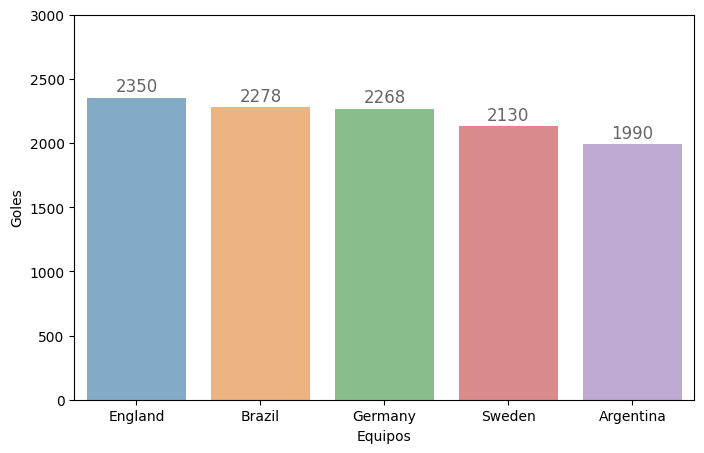

In [77]:
team_list = top_5.index.to_list()

plt.figure(figsize=(8,5))
sns.barplot(top_5,x="team",y="goals", hue= "team",alpha=0.6)
plt.ylim(0,3000)
plt.xlabel("Equipos")
plt.ylabel("Goles")
ax = plt.gca()  # Obtener el eje actual
for bar in ax.patches:  # Iterar sobre todas las barras del gráfico
    height = bar.get_height()  # Altura de la barra (valor de goles)
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición horizontal (centrado en la barra)
        height + 50,  # Posición vertical (ligeramente por encima de la barra)
        f'{int(height)}',  # Texto con el valor de la barra
        ha='center', fontsize=12, color='k', alpha=0.6
    )



plt.show()

- los equipos mas goleadores son Inglaterra, Brazil, Alemania, Suecia, Argentina

# segunda pregunta

- quienes fueron los 3 mas goleadores

In [78]:
df_goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [79]:
df_goals["scorer"].value_counts().nlargest(5)

scorer
Cristiano Ronaldo     108
Robert Lewandowski     63
Romelu Lukaku          60
Harry Kane             58
Lionel Messi           55
Name: count, dtype: int64

In [80]:
# Obtener los valores más frecuentes en la columna 'scorer'
scorer_counts = df_goals['scorer'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
scorer_counts.columns = ['scorer', 'goals']

# Guardar el resultado en otro DataFrame
df_scorer_counts = scorer_counts

# Mostrar los primeros valores más frecuentes
df_scorer_3 = df_scorer_counts.head(3)

In [81]:
df_scorer_3

,scorer,goals
0,Cristiano Ronaldo,108
1,Robert Lewandowski,63
2,Romelu Lukaku,60


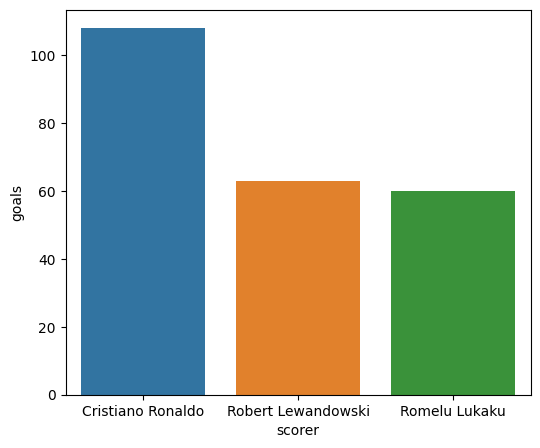

In [82]:
plt.figure(figsize=(6,5))
sns.barplot(df_scorer_3,x="scorer",y= "goals",hue="scorer")

plt.show()

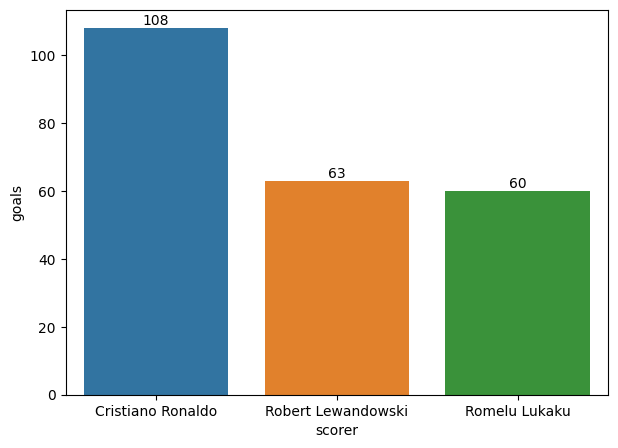

In [83]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x="scorer", y="goals", hue="scorer", data=df_scorer_3, dodge=False)

# Añadir anotaciones de goles encima de cada barra
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posición x centrada en la barra
        p.get_height(),  # Posición y ligeramente encima de la barra
        f'{int(p.get_height())}',  # El valor de goles
        ha='center',  # Alineación horizontal
        va='bottom',  # Alineación vertical
        fontsize=10,  # Tamaño de la fuente
        color='black'  # Color del texto
    )


# Mostrar el gráfico
plt.show()

# 3 pregunta cuando se metieron mas goles 

In [84]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47912,2024-11-19,Oman,Iraq,0,1,FIFA World Cup qualification,Muscat,Oman,False
47913,2024-11-19,Kuwait,Jordan,1,1,FIFA World Cup qualification,Kuwait City,Kuwait,False
47914,2024-11-19,Bahrain,Australia,2,2,FIFA World Cup qualification,Riffa,Bahrain,False
47915,2024-11-19,Indonesia,Saudi Arabia,2,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [85]:
df_results["total_goles_dia"] = df_results["home_score"] + df_results["away_score"]

In [86]:
df_results['date'] = pd.to_datetime(df_results['date'])

In [87]:
df_results['year'] = df_results['date'].dt.year

In [88]:
df_goles_por_ano = df_results.groupby('year')['total_goles_dia'].sum().reset_index()

In [89]:
df_goles_por_ano

,year,total_goles_dia
0,1872,0
1,1873,6
2,1874,3
3,1875,4
4,1876,7
...,...,...
148,2020,847
149,2021,3076
150,2022,2437
151,2023,3003


In [90]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             47917 non-null  datetime64[ns]
 1   home_team        47917 non-null  object        
 2   away_team        47917 non-null  object        
 3   home_score       47917 non-null  int64         
 4   away_score       47917 non-null  int64         
 5   tournament       47917 non-null  object        
 6   city             47917 non-null  object        
 7   country          47917 non-null  object        
 8   neutral          47917 non-null  bool          
 9   total_goles_dia  47917 non-null  int64         
 10  year             47917 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(3), object(5)
memory usage: 3.5+ MB


In [91]:
years = df_goles_por_ano['year']  # Años en tu dataframe
goles = df_goles_por_ano['total_goles_dia']
year_destacado = 2020
goles_destacado = goles[years == year_destacado].values[0] 

In [92]:
max_idx = goles.idxmax()
year_max = years[max_idx]
goles_max = goles[max_idx]

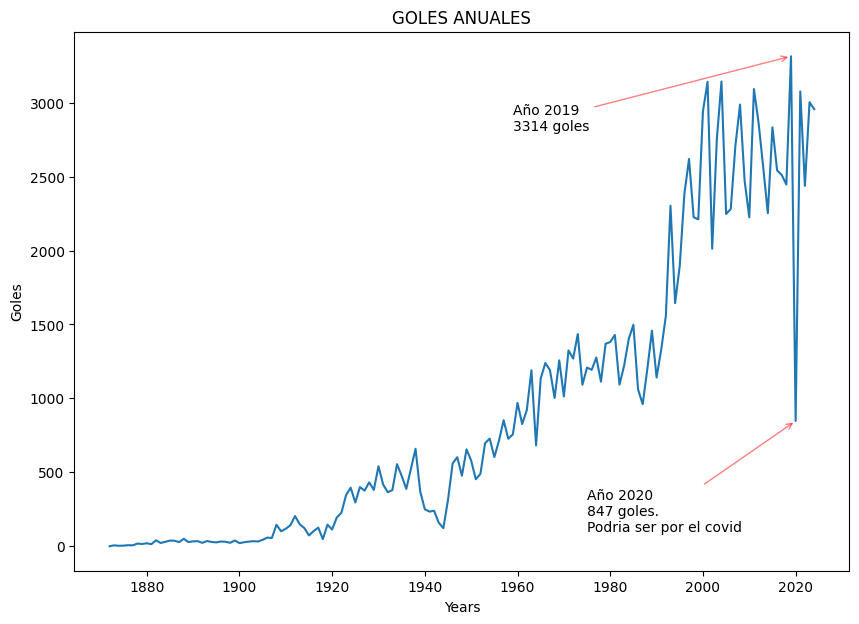

In [93]:
plt.figure(figsize=(10,7))
sns.lineplot(df_goles_por_ano,x="year",y= "total_goles_dia")
plt.xlabel("Years")
plt.ylabel("Goles")
plt.title("GOLES ANUALES")


plt.annotate(f"Año {year_destacado}\n{goles_destacado} goles. \nPodria ser por el covid",
             xy=(year_destacado, goles_destacado),  # Coordenada del punto a marcar
             xytext=(year_destacado - 45, goles_destacado - 750),  # Posición del texto
             arrowprops=dict(color='red', arrowstyle='->', alpha=0.5),  # Flecha estilo -> en rojo
             fontsize=10)

plt.annotate(f"Año {year_max}\n{goles_max} goles",
             xy=(year_max, goles_max),           # Coordenadas del punto máximo
             xytext=(year_max - 60, goles_max - 500),  # Posición del texto (ajustable)
             arrowprops=dict(color='red', arrowstyle='->', alpha= 0.5),  # Flecha roja
             fontsize=10, color='k')
plt.show()

# 4 en que torneo se metieron mas goles

In [94]:
goles_por_torneo = df_results.groupby('tournament')['total_goles_dia'].sum().reset_index()

# Ordenar por la cantidad de goles en orden descendente
goles_por_torneo = goles_por_torneo.sort_values(by='total_goles_dia', ascending=False)

In [122]:
# # Calcular cantidad de encuentros por torneo
# encuentros_por_torneo = df_results.groupby("tournament").size().reset_index(name="cantidad_encuentros")

# # Ordenar por cantidad de encuentros (opcional)
# encuentros_por_torneo = encuentros_por_torneo.sort_values(by="cantidad_encuentros", ascending=False)

# # Mostrar los resultados
# encuentros_por_torneo

In [121]:
# encuentros_por_torneo.head(10)

In [119]:
goles_por_torneo.head(10)

,tournament,total_goles_dia
85,Friendly,52005
81,FIFA World Cup qualification,23878
162,UEFA Euro qualification,7996
9,African Cup of Nations qualification,5358
48,Copa América,2740
80,FIFA World Cup,2720
2,AFC Asian Cup qualification,2551
30,CFU Caribbean Cup qualification,2125
114,Merdeka Tournament,1960
8,African Cup of Nations,1886


In [96]:
torneos = goles_por_torneo.nlargest(5,"total_goles_dia")



In [97]:
torneos

,tournament,total_goles_dia
85,Friendly,52005
81,FIFA World Cup qualification,23878
162,UEFA Euro qualification,7996
9,African Cup of Nations qualification,5358
48,Copa América,2740


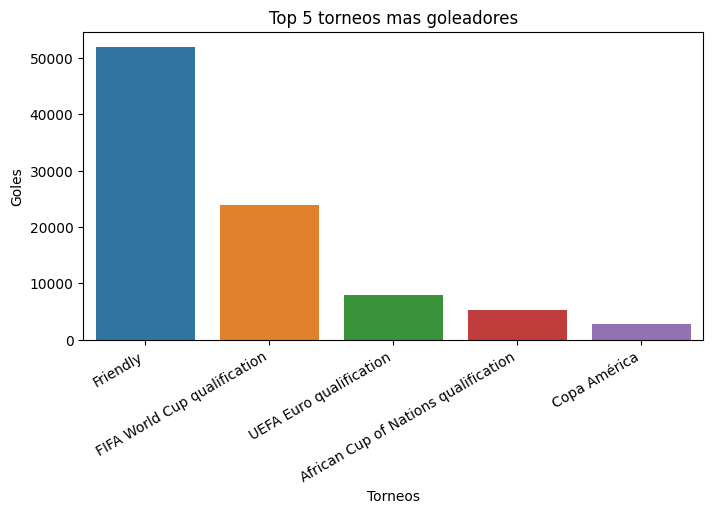

In [107]:
plt.figure(figsize=(8,4))

sns.barplot(torneos, x="tournament", y= "total_goles_dia",hue="tournament")
plt.xlabel("Torneos")
plt.ylabel("Goles")
plt.title("Top 5 torneos mas goleadores")
plt.xticks(rotation=30, ha= "right" )




plt.show()

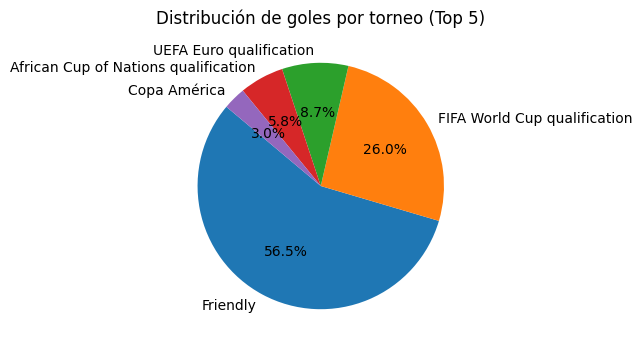

In [99]:
# Datos: nombres de torneos y goles
labels = torneos['tournament']  # Nombres de los torneos
sizes = torneos['total_goles_dia']  # Goles totales en cada torneo

# Crear el gráfico de pie
plt.figure(figsize=(4, 4))  # Tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # Configuración
plt.title("Distribución de goles por torneo (Top 5)")
plt.show()

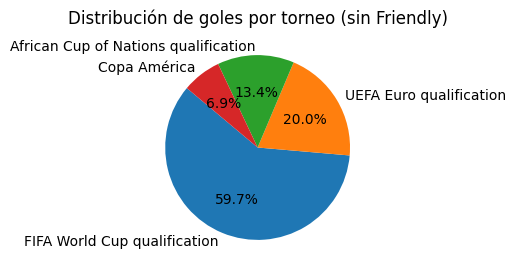

In [101]:
filtered_data = torneos[torneos["tournament"] != "Friendly"]

# Crear gráfico de pie
plt.figure(figsize=(5, 3))
plt.pie(filtered_data["total_goles_dia"], 
        labels=filtered_data["tournament"], 
        autopct='%1.1f%%', 
        startangle=140)

# Título y ajuste
plt.title("Distribución de goles por torneo (sin Friendly)")
plt.show()